In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data/raw/Emotion_final.csv


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import tensorflow as tf
from tensorflow import keras

In [10]:
data = pd.read_csv('../data/raw/Emotion_final.csv')

In [14]:
data.columns

Index(['Text', 'Emotion'], dtype='object')

In [11]:
data.shape

(21459, 2)

In [12]:
data['Emotion'].value_counts()

happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: Emotion, dtype: int64

In [23]:
results = data['Emotion'].value_counts()

In [27]:
results.

Index(['happy', 'sadness', 'anger', 'fear', 'love', 'surprise'], dtype='object')

<AxesSubplot:xlabel='Count', ylabel='Emotion'>

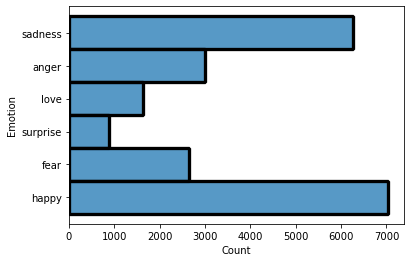

In [13]:
sns.histplot(data=data, y="Emotion")

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(data['Emotion'].values)

sentences = data['Text'].values


In [18]:
sentences_train, sentences_test, y_train, y_test = train_test_split(
   sentences, y, test_size=0.25, random_state=1000)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<16094x16471 sparse matrix of type '<class 'numpy.int64'>'
	with 251088 stored elements in Compressed Sparse Row format>

In [22]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.8823858341099721


In [ ]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))